### Methode :
- **Support Vector Machine (SVM)** : Un algorithme de classification qui trouve l'hyperplan optimal dans un espace de grande dimension pour séparer les différentes classes. Il peut également être étendu pour gérer des problèmes non linéaires en utilisant des noyaux.

- **Régression logistique** : Un algorithme utilisé pour la classification binaire (et pouvant être étendu à la classification multiclasse) en modélisant la probabilité que chaque classe soit la classe cible à l'aide d'une fonction logistique.
- **Random Forest** : Un algorithme d'ensemble utilisé pour la classification et la régression. Il combine les prédictions de plusieurs arbres de décision pour obtenir une prédiction plus robuste et généralement de meilleure qualité.
- **Réseaux de neurones** :
- **Perceptron ou Multi-perceptron** :
- **Gradient Boosting** : Un autre algorithme d'ensemble qui construit des arbres de décision de manière séquentielle, en corrigeant les erreurs des arbres précédents. Cela conduit à un modèle de prédiction puissant.
- **Naive Bayes** : Un classificateur probabiliste simple basé sur le théorème de Bayes avec une forte indépendance entre les fonctionnalités. Il est souvent utilisé pour la classification de texte et d'autres tâches où l'indépendance des fonctionnalités est une hypothèse raisonnable.





# Preprocess
- Normaliser
- Mettre à l'échelle
- Reduction de dimensionnalité

# Processing (6 methode)
- Une methode à hypothèse Gaussienne ou autres (Exemple : Naive Bayes -> GaussianNB, MultinomialNB, )
- Logistic Regression
- SVM
- Random Forest
- MLP
- AdaBoost 


# Interrogation
Comment les modèles se comportent avant et aprés le preprocessing ?
Est-ce que les méthodes qui admettent une hypothèse d'une distribution comme Gaussienne, donnes t'elles un bon résultat ?
Est-ce qu'en faisant l'entrainement sur les images on aura un bon résultat par rapport au features ?
Il y a des modèles qui donne des moins bons résultats que les autres pourquoi ? 

# Evaluation et métriques
- Évaluer les performances des modèles : Évaluez les performances de chaque modèle sur l'ensemble de validation en utilisant différentes mesures telles que l'accuracy, la précision, le rappel, le score F1, etc.
- Faire une matrice de confusion pour analyser les modèles qui ne donne pas des bons résultats




 

In [17]:
import sklearn
import numpy as np # linear algebra
import pandas as pd 

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

Leaf Classificatio

In [18]:
data_dir_path = '../data/external'
d_train = pd.read_csv(data_dir_path + "/train.csv")
d_test = pd.read_csv(data_dir_path + '/test.csv')

## Pre-traitement des données
### Separer les classes de features
`y_train` = classes or label
`x_train` = features

In [19]:
d_train.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [20]:
d_test.columns

Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)

In [21]:
classes = d_train['species'].unique()

In [22]:
classes

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [23]:
classes.shape

(99,)

#### Encoder les labels en numérique

In [24]:
processed_data = d_train.copy() # copy 
processed_test_data = d_test.copy() # test data n'ont pas des labels
# Initialize the encoder
le = LabelEncoder()

# Encode the 'species' column
processed_data['species'] = le.fit_transform(processed_data['species']) # encoder species



processed_data

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,40,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,5,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,11,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,78,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


### Mise à l'échelle
La mise à l'échelle des données, ou normalisation, est une étape cruciale en prétraitement des données. le but :


1. **Uniformité**: Elle assure que toutes les caractéristiques numériques contribuent également à l'analyse sans être biaisées par leur échelle d'origine.

2. **Meilleure convergence**: Beaucoup d'algorithmes de machine learning, comme les réseaux de neurones et les méthodes de descente de gradient, convergent plus rapidement lorsque les données sont mises à l'échelle.

3. **Amélioration des performances**: Certains algorithmes, en particulier ceux qui utilisent des mesures de distance comme k-means ou k-NN, ont de meilleures performances si toutes les caractéristiques sont sur une échelle comparable.

4. **Stabilité numérique**: La mise à l'échelle peut aussi aider à éviter des problèmes numériques qui peuvent survenir lorsque les caractéristiques ont des ordres de grandeur très différents.

En somme, la mise à l'échelle des données aide à rendre le processus d'apprentissage automatique plus efficace et plus stable.

Test data

In [25]:
scaler = MinMaxScaler()
# test data
# Scale numeric columns. Exclude 'id' and 'species' from being scaled
numeric_cols = processed_test_data.columns.drop(['id'])
processed_test_data[numeric_cols] = scaler.fit_transform(processed_test_data[numeric_cols])
processed_test_data


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.227268,0.051549,0.465113,0.071431,0.041664,0.057555,0.066662,0.000000,0.069763,...,0.019337,0.000000,0.101911,0.005497,0.186047,0.0,0.0,0.000000,0.044941,0.359487
1,7,0.090903,0.030926,0.383717,0.059527,0.041664,0.050361,0.088883,0.000000,0.395349,...,0.000000,0.000000,0.044586,0.010989,0.162793,0.0,0.0,0.003954,0.426962,0.300663
2,9,0.000000,0.000000,0.011627,0.130952,0.437504,0.000000,0.266671,0.000000,0.139538,...,0.364647,0.000000,0.006372,0.000000,0.000000,0.0,0.0,0.063241,0.000000,0.000000
3,12,0.000000,0.000000,0.058141,0.071431,0.187499,0.000000,0.044441,0.000000,0.046509,...,0.035910,0.035398,0.019110,0.203303,0.162793,0.0,0.0,0.363638,0.000000,0.058825
4,13,0.022726,0.000000,0.093023,0.059527,0.416661,0.000000,0.111115,0.000000,0.069763,...,0.000000,0.097345,0.108283,0.060440,0.488379,0.0,0.0,0.031619,0.112364,0.052286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.000000,0.000000,0.023254,0.095240,0.437504,0.000000,0.199998,0.000000,0.069763,...,0.279003,0.000000,0.031848,0.000000,0.046509,0.0,0.0,0.075100,0.000000,0.006539
590,1577,0.000000,0.020618,0.023254,0.035713,0.187499,0.000000,0.199998,0.272715,0.000000,...,0.035910,0.011062,0.031848,0.016486,0.116284,0.0,0.0,0.367588,0.000000,0.111117
591,1579,0.204543,0.154642,0.093023,0.083335,0.041664,0.057555,0.288892,0.000000,0.000000,...,0.207179,0.000000,0.184712,0.000000,0.023254,0.0,0.0,0.000000,0.494385,0.045753
592,1580,0.159091,0.051549,0.360463,0.154767,0.374997,0.093528,0.444437,0.000000,0.046509,...,0.011049,0.000000,0.006372,0.000000,0.139538,0.0,0.0,0.000000,0.134834,0.124188


Train data

In [26]:
# Initialize the scaler
scaler = MinMaxScaler()

# train data
# Scale numeric columns. Exclude 'id' and 'species' from being scaled
numeric_cols = processed_data.columns.drop(['id', 'species'])
processed_data[numeric_cols] = scaler.fit_transform(processed_data[numeric_cols])
processed_data

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,3,0.088883,0.114287,0.150003,0.022987,0.105264,0.031447,0.297875,0.0,...,0.018181,0.000000,0.016951,0.014635,0.330258,0.000000,0.000000,0.012987,0.000000,0.179315
1,2,49,0.066662,0.000000,0.200000,0.091955,0.228070,0.006289,0.212763,0.0,...,0.002274,0.000000,0.000000,0.004880,0.220178,0.000000,0.000000,0.002599,0.449433,0.158623
2,3,65,0.066662,0.047620,0.124998,0.045975,0.035085,0.018867,0.744676,0.0,...,0.359096,0.000000,0.033896,0.004880,0.073387,0.000000,0.000000,0.000000,0.235957,0.020692
3,5,94,0.000000,0.019046,0.150003,0.034481,0.192976,0.062892,0.255324,0.0,...,0.000000,0.004833,0.000000,0.000000,0.192654,0.000000,0.000000,0.046752,0.000000,0.337938
4,6,84,0.066662,0.019046,0.312499,0.057474,0.122806,0.050314,0.063826,0.0,...,0.224999,0.000000,0.124293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,40,0.688887,0.580944,0.049997,0.022987,0.000000,0.477991,0.191488,0.0,...,0.563639,0.000000,0.197744,0.000000,0.100911,0.000000,0.000000,0.000000,0.000000,0.131038
986,1578,5,0.022221,0.019046,0.137498,0.632180,0.017542,0.000000,0.000000,0.0,...,0.397729,0.000000,0.107347,0.000000,0.110089,0.000000,0.000000,0.002599,0.000000,0.151723
987,1581,11,0.022221,0.019046,0.000000,0.126436,0.701743,0.012578,0.085101,0.0,...,0.011364,0.004833,0.028250,0.136583,0.155961,0.013513,0.000000,0.072727,0.000000,0.013792
988,1582,78,0.000000,0.000000,0.300000,0.333339,0.087721,0.000000,0.000000,0.0,...,0.193181,0.149755,0.005652,0.014635,0.137605,0.000000,0.277413,0.000000,0.022470,0.020692


In [27]:
processed_data.describe()


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,49.000000,0.198113,0.139162,0.204722,0.137003,0.128121,0.124229,0.209176,0.034657,...,0.084947,0.024852,0.092240,0.057870,0.151323,0.024246,0.017758,0.053968,0.103428,0.137146
std,452.477568,28.591824,0.224585,0.189462,0.165420,0.167204,0.165182,0.167540,0.190756,0.087770,...,0.147556,0.095579,0.134303,0.125074,0.144056,0.104044,0.075408,0.103835,0.158677,0.160789
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,24.000000,0.022221,0.009523,0.087501,0.034481,0.017542,0.000000,0.063826,0.000000,...,0.000000,0.000000,0.005652,0.000000,0.045871,0.000000,0.000000,0.000000,0.000000,0.006900
50%,802.500000,49.000000,0.111115,0.057144,0.162502,0.080461,0.070170,0.050314,0.170213,0.000000,...,0.011364,0.000000,0.033896,0.004880,0.119258,0.000000,0.000000,0.010389,0.033711,0.082761
75%,1195.500000,74.000000,0.288892,0.200000,0.287501,0.172416,0.157891,0.180817,0.319150,0.000000,...,0.101704,0.000000,0.128532,0.048781,0.201822,0.000000,0.000000,0.062338,0.146064,0.206900
max,1584.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
processed_data['species'].unique()


array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 13, 66, 15,  6, 73, 22, 36, 27, 88, 12, 28, 21, 25,
       20, 60, 69, 23, 76, 18, 52,  9, 48, 47, 64, 81, 62, 34, 92, 79, 82,
       32, 35, 72, 71, 11, 51,  5,  8, 37, 97, 33,  1, 59, 56, 57, 29, 93,
       10, 46,  0, 39,  2, 24, 26, 87, 55, 38, 45,  7, 67, 30, 61, 96, 41,
       85, 14, 17, 42, 63, 86, 80, 77, 19, 95, 70, 90, 68, 91])

In [29]:
x_train = processed_data.drop(columns=['id', 'species'])
y_train = processed_data['species']
x_test = processed_test_data.drop(columns=['id'])


In [36]:
print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)
print("x_test shape :", x_test.shape)

x_train shape : (990, 192)
y_train shape : (990,)
x_test shape : (594, 192)


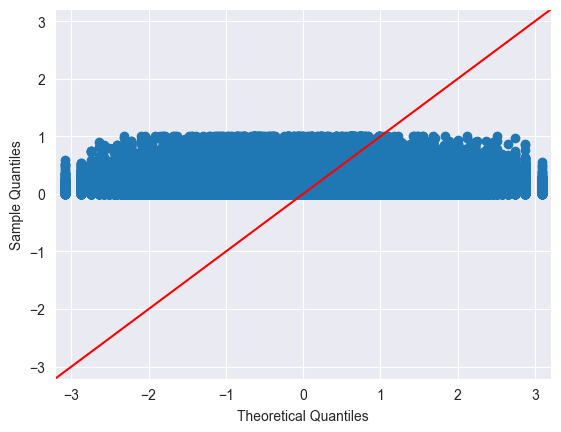

In [30]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supposons que X est votre ensemble de données k-dimensionnel
# Pour l'exemple, nous utilisons une seule dimension de X
# x = X[:,0]  # Remplacez 0 par l'indice de la dimension que vous voulez tester

# Génération du Q-Q plot
sm.qqplot(x_train, line ='45')
plt.show()


In [31]:
from sklearn.mixture import GaussianMixture

# Supposons que X est votre ensemble de données de 10 dimensions
# Création du modèle de mélange gaussien avec un certain nombre de composants
gmm = GaussianMixture(n_components=3)  # Vous pouvez choisir le nombre de composants

# Ajustement du modèle sur les données
gmm.fit(x_train)

# Prédiction des étiquettes pour les données
labels = gmm.predict(x_test)


# Entrainement


### Random Forest

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

#clf1 = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
#scores = cross_val_score(clf1, x_train, y_train, cv=5)
#scores.mean()


In [33]:
clf2 = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf2, x_train, y_train, cv=5)
scores.mean()



0.8808080808080808

In [35]:
from sklearn.ensemble import RandomForestClassifier
from src.models.train_model import CrossValidate


# Définir les hyperparamètres à rechercher
rfc_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Créer une instance du modèle Random Forest
rfc_model = RandomForestClassifier()

# Effectuer une recherche des hyperparamètres avec validation croisée
cross_val = CrossValidate(model=rfc_model, params=rfc_param_grid, k_fold=5, metric='accuracy')
cross_val.train(x_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", cross_val.best_params)

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_ = cross_val.best_params
best_rfc_model = cross_val.best_model
best_rfc_model.fit(x_train, y_train)

Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier()

In [39]:
train_score = best_rfc_model.score(x_train, y_train)
#test_score = best_rfc_model.score(x_test,)
train_score

1.0

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Diviser vos données en ensembles d'entraînement et de validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Créer un modèle RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

# Entraîner le modèle et collectez les scores d'accuracy pour chaque itération
train_scores = []
val_scores = []
for i in range(10): 
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    val_score = clf.score(x_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

# Afficher l'évolution des scores d'accuracy
plt.plot(train_scores, label='Training accuracy')
plt.plot(val_scores, label='Validation accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier

class TrainingHistory(BaseEstimator):
    def __init__(self):
        self.accuracy_history = []

    def on_epoch_end(self, clf, x_train, y_train):
        accuracy = clf.score(x_train, y_train)
        self.accuracy_history.append(accuracy)



### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(solver='adam', alpha=1e-5, learning_rate='adaptive', max_iter= 1000,
                    hidden_layer_sizes=(5,), random_state=1, verbose= False)
clf.fit(x_train, y_train)
clf.best_loss_
#clf.predict(x_test)
#clf.predict(x_test)

In [ ]:
from src.models.train_model import CrossValidate
from sklearn.neural_network import MLPClassifier

# Définir les hyperparamètres à rechercher
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Créer une instance du modèle MLP
mpl_model = MLPClassifier(max_iter=500)

# Effectuer une recherche des hyperparamètres avec validation croisée
grid_search = CrossValidate(model=clf, params=param_grid, k_fold=5, metric='accuracy')
grid_search.train(x_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params)

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_model = grid_search.best_model
best_model.fit(x_train, y_train)


In [ ]:

'''

# Calcul du taux d'erreur
error_rate = 1 - accuracy_score(y_train, perceptron_pred_train)

# Calcul de la précision
precision = precision_score(y_train, perceptron_pred_train)

# Calcul du rappel
recall = recall_score(y_train, perceptron_pred_train)

# Calcul du score F1
f1 = f1_score(y_train, perceptron_pred_train)

print("Taux d'erreur:", error_rate)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)
'''

### SVM

### Logistic Regression

### Réseaux de neurones